# IMPORTACION DE LOS 2 EXCEL

In [14]:
import pandas as pd

# Define la ruta del archivo y el nombre de la hoja
file_path = 'RE223132_2023.xlsx'
sheet_name = 'datos'

# Carga los datos en un DataFrame
df1 = pd.read_excel(file_path, sheet_name=sheet_name)

# Muestra las primeras filas del DataFrame
print(df1.head())


# Ruta del archivo Excel
file_path1 = 'REC_21_2023.xlsx'

# Nombre de la hoja que deseas leer
sheet_name1 = 'REC_21_20231'

# Importar el archivo Excel
df2 = pd.read_excel(file_path1, sheet_name=sheet_name1)

# Mostrar las primeras filas del DataFrame
print(df2.head())


    ID1              CASEID  V201  V202  V203  V204  V205  V206  V207  V208  \
0  2023        000100601  2     4     1     3     0     0     0     0     1   
1  2023        000100601  3     0     0     0     0     0     0     0     0   
2  2023        000101001  3     0     0     0     0     0     0     0     0   
3  2023        000102201  2     1     0     1     0     0     0     0     1   
4  2023        000102801  1     2     1     1     0     0     0     0     1   

   ...  V307_07  V307_08  V307_09  V307_10  V307_11  V307_12  V307_13  \
0  ...               1.0      0.0      NaN      NaN               0.0   
1  ...               NaN      NaN      NaN      NaN               NaN   
2  ...               NaN      NaN      NaN      NaN               NaN   
3  ...               0.0      NaN      NaN      1.0               NaN   
4  ...               0.0      0.0      NaN      NaN               NaN   

   V307_14  V307_15  V307_16  
0      NaN      NaN      NaN  
1      NaN      NaN     

In [15]:
# Realizar la unión (join) en base a la columna CASEID
merged_df = pd.merge(df1, df2, on='CASEID', how='inner')  # Puedes cambiar 'inner' a 'outer', 'left', o 'right' según tus necesidades

# Mostrar las primeras filas del DataFrame unido
print(merged_df.head())

   ID1_x              CASEID  V201  V202  V203  V204  V205  V206  V207  V208  \
0   2023        000100601  2     4     1     3     0     0     0     0     1   
1   2023        000100601  2     4     1     3     0     0     0     0     1   
2   2023        000100601  2     4     1     3     0     0     0     0     1   
3   2023        000100601  2     4     1     3     0     0     0     0     1   
4   2023        000102201  2     1     0     1     0     0     0     0     1   

   ...  BCMC  BEDAD  QD333_1  QD333_2  QD333_3  QD333_4  QD333_5  QD333_6  \
0  ...  1478    260      NaN      NaN      NaN      NaN      NaN      NaN   
1  ...  1478    239      NaN      NaN      NaN      NaN      NaN      NaN   
2  ...  1478     88      NaN      NaN      NaN      NaN      NaN      NaN   
3  ...  1478     42      2.0      2.0      2.0      2.0      2.0      2.0   
4  ...  1478     27      2.0      2.0      2.0      2.0      2.0      2.0   

   Q220A  QULT5  
0    NaN      0  
1    NaN      0  
2 

In [16]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Supongamos que tienes un DataFrame `df` con las columnas necesarias
merged_df['total_hijos_fallecidos'] = merged_df['V206'] + merged_df['V207']

# Ajustar el modelo de regresión binomial negativa con exceso de ceros
# Suponiendo que las variables independientes sean X1, X2, X3...


# formula = 'total_hijos_fallecidos ~ X1 + X2 + X3'
# modelo = smf.zeroinfl(formula, df, dist='negbin')

# # Resultados del modelo
# resultados = modelo.fit()
# print(resultados.summary())

In [17]:
# CONVIERTE PDF A EXCEL PARA AGREGAR LOS DICCIONARIOS
import tabula
import pandas as pd

# Ruta del archivo PDF
pdf_path = 'Diccionario - RE223132.pdf'

# Extraer tablas del archivo PDF
tables = tabula.read_pdf(pdf_path, pages='all')

# Combinar todas las tablas extraídas en un solo DataFrame
combined_df = pd.concat(tables, ignore_index=True)

# Exportar el DataFrame combinado a un archivo Excel
excel_path = 'Diccionario - RE223132.xlsx'
combined_df.to_excel(excel_path, index=False)

print(f"El archivo PDF ha sido convertido a Excel y guardado como {excel_path}")


El archivo PDF ha sido convertido a Excel y guardado como Diccionario - RE223132.xlsx


In [18]:
# CONVIERTE PDF A EXCEL PARA AGREGAR LOS DICCIONARIOS
import tabula
import pandas as pd

# Ruta del archivo PDF
pdf_path = 'Diccionario - REC21.pdf'

# Extraer tablas del archivo PDF
tables = tabula.read_pdf(pdf_path, pages='all')

# Combinar todas las tablas extraídas en un solo DataFrame
combined_df = pd.concat(tables, ignore_index=True)

# Exportar el DataFrame combinado a un archivo Excel
excel_path = 'Diccionario - REC21.xlsx'
combined_df.to_excel(excel_path, index=False)

print(f"El archivo PDF ha sido convertido a Excel y guardado como {excel_path}")

El archivo PDF ha sido convertido a Excel y guardado como Diccionario - REC21.xlsx


#Estructura de datos


In [20]:
# Obtener la estructura del DataFrame
estructura_df = merged_df.dtypes.reset_index()
estructura_df.columns = ['Nombre_Columna', 'Tipo_Dato']

# Exportar la estructura a un archivo Excel
archivo_excel = 'estructura_dataframe.xlsx'
estructura_df.to_excel(archivo_excel, index=False)

print(f"La estructura del DataFrame ha sido exportada a {archivo_excel}")

La estructura del DataFrame ha sido exportada a estructura_dataframe.xlsx


#VALORES NULOS

<Figure size 2000x800 with 0 Axes>

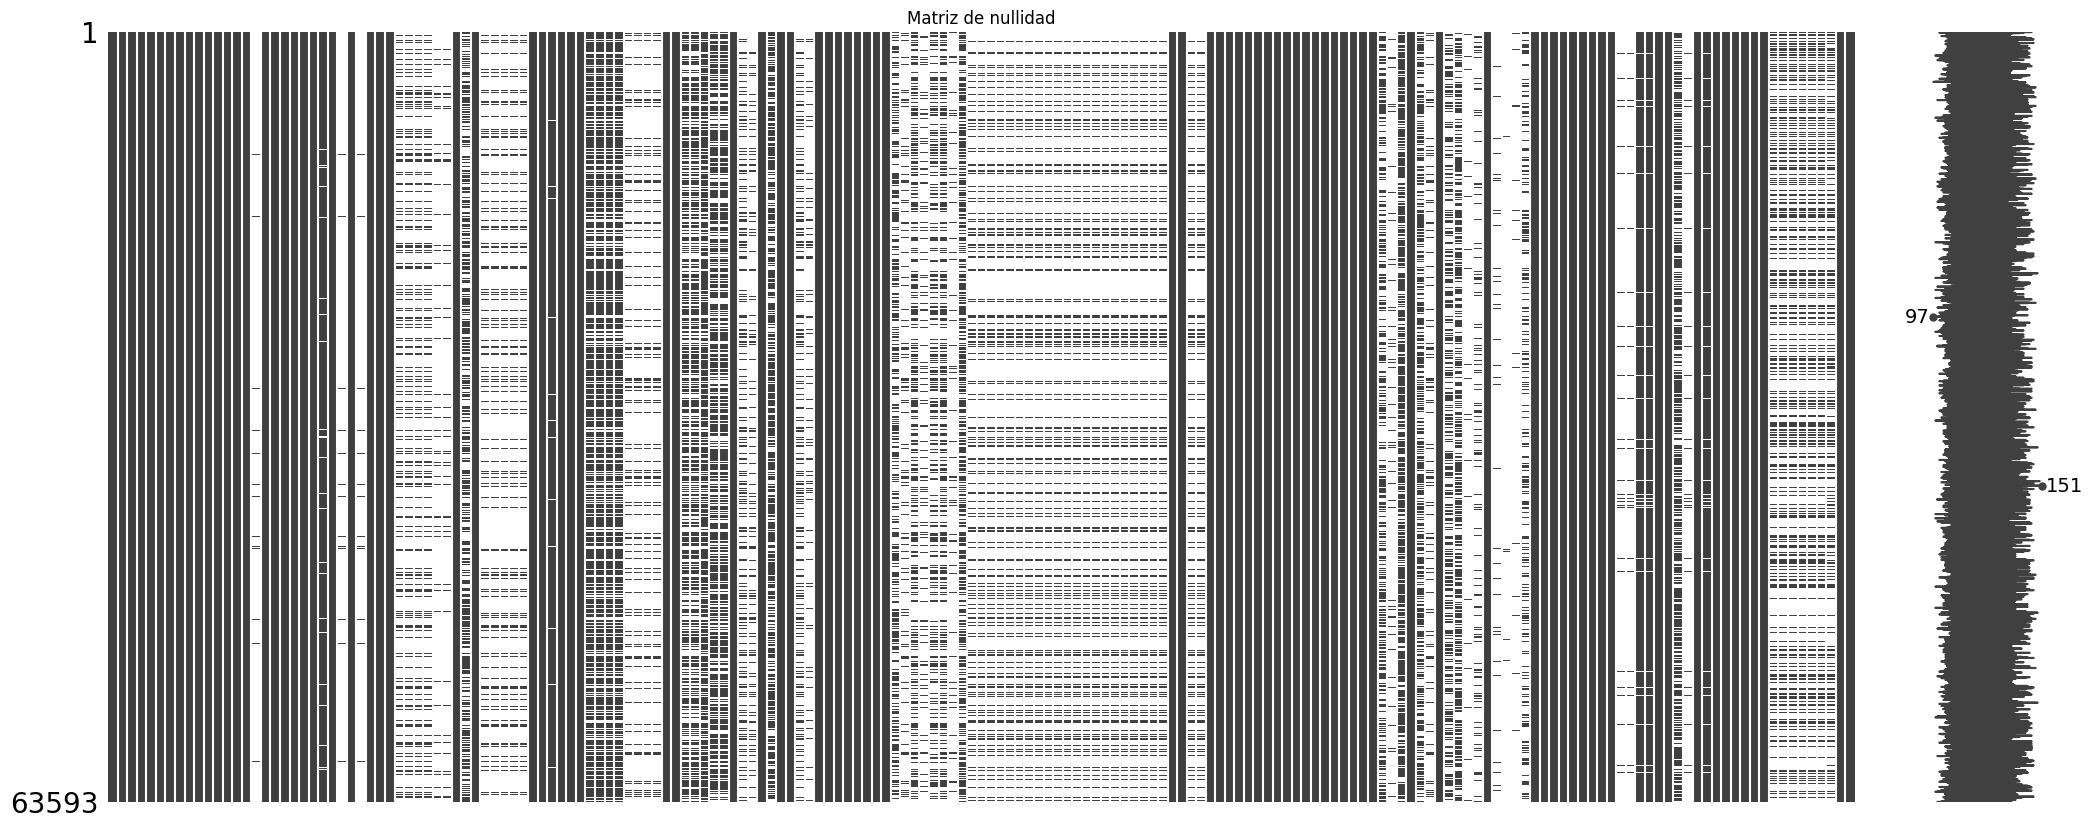

<Figure size 2000x800 with 0 Axes>

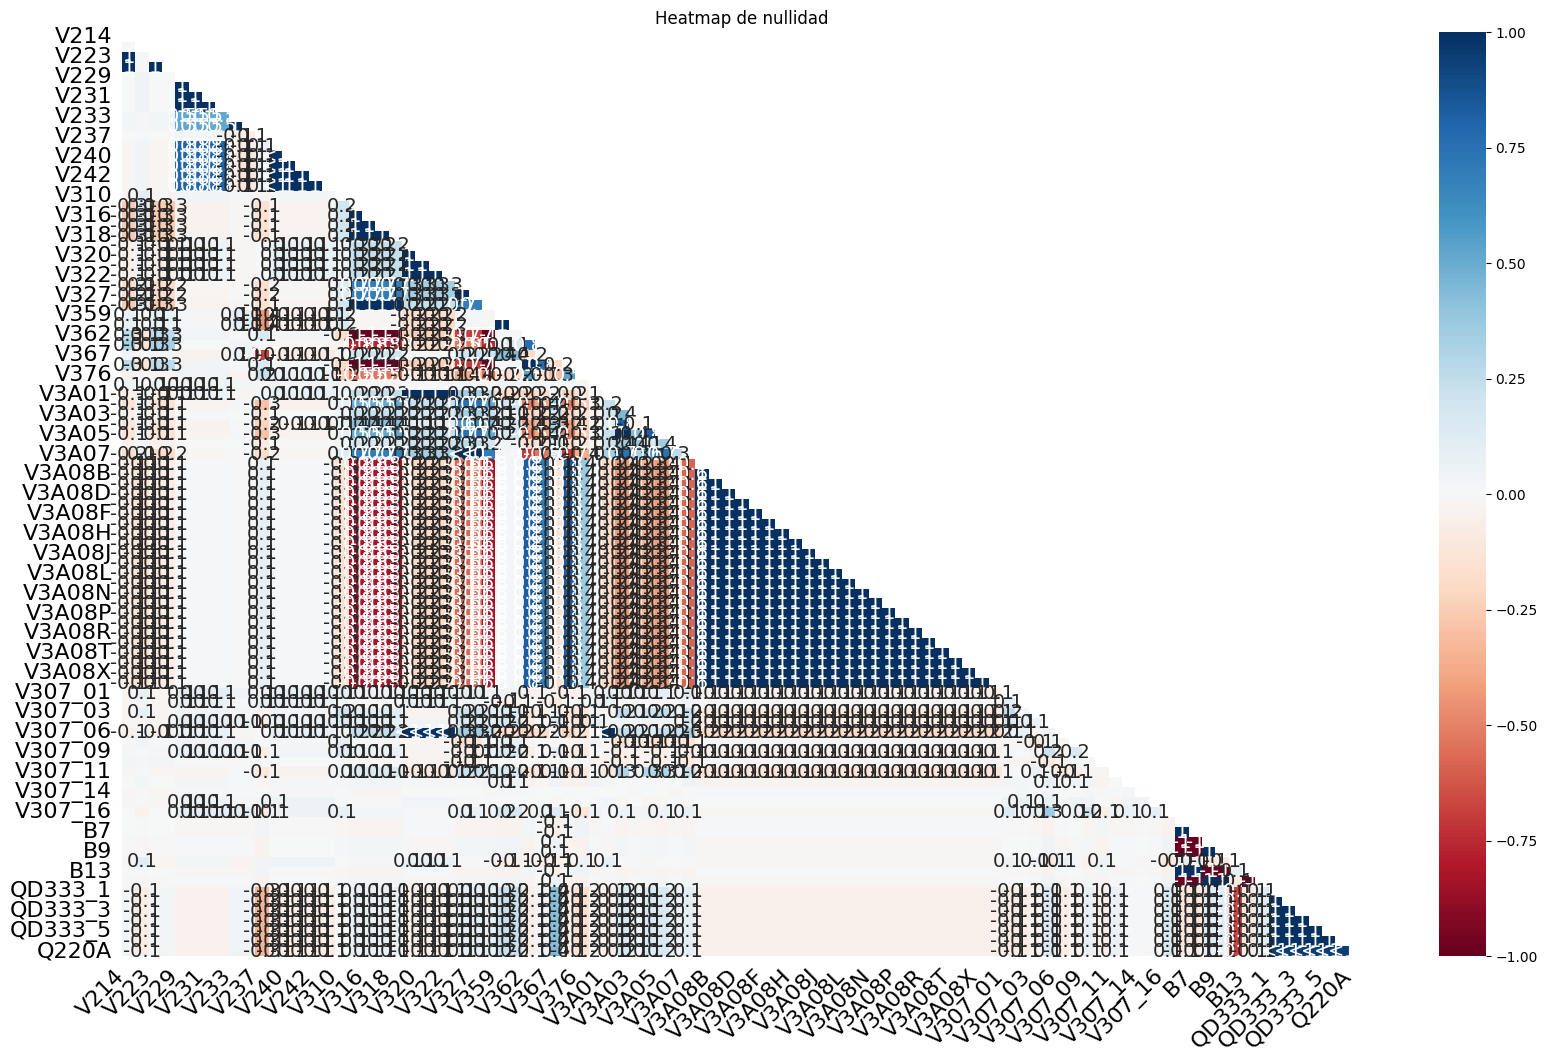

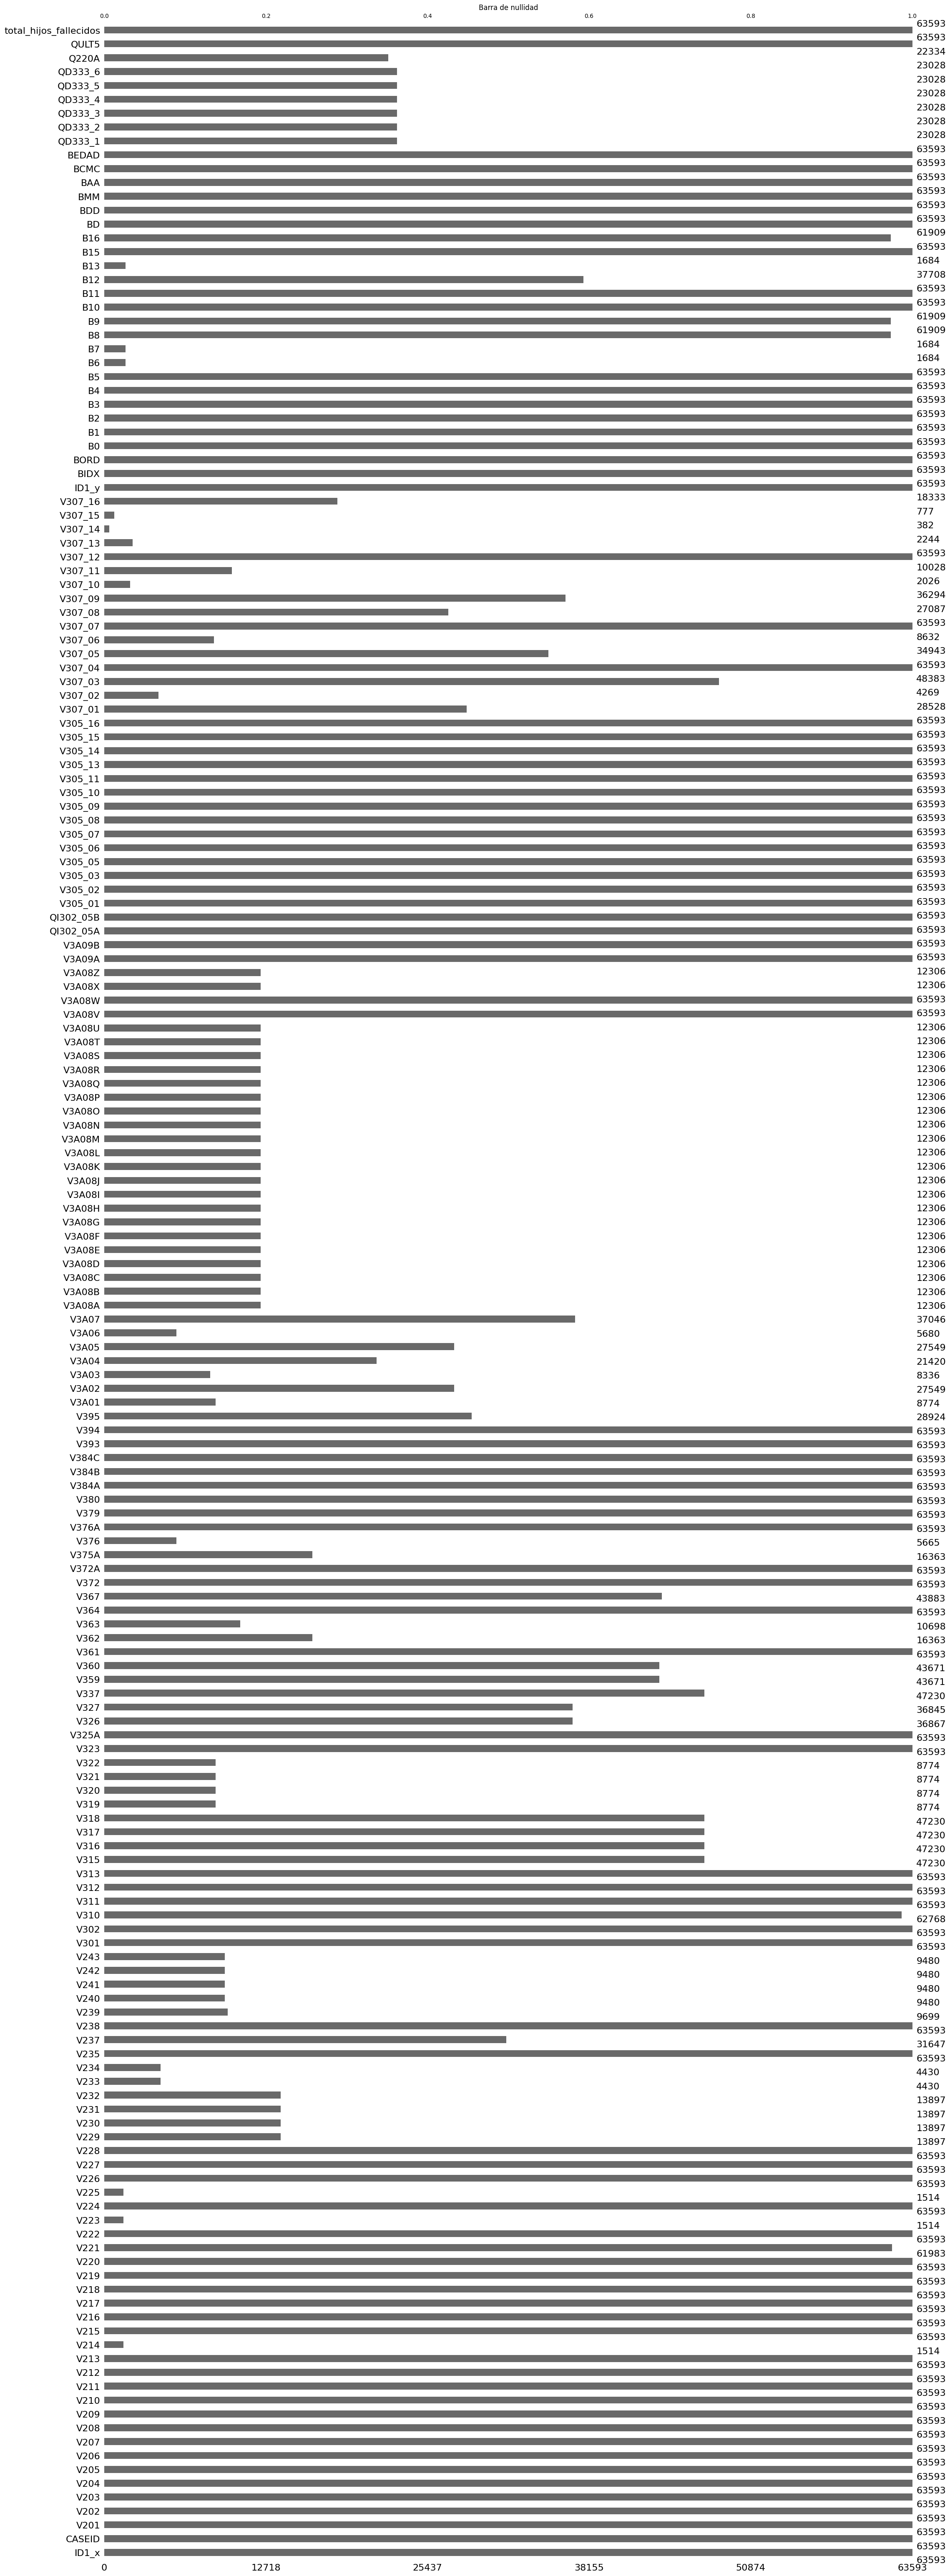

<Figure size 2000x800 with 0 Axes>

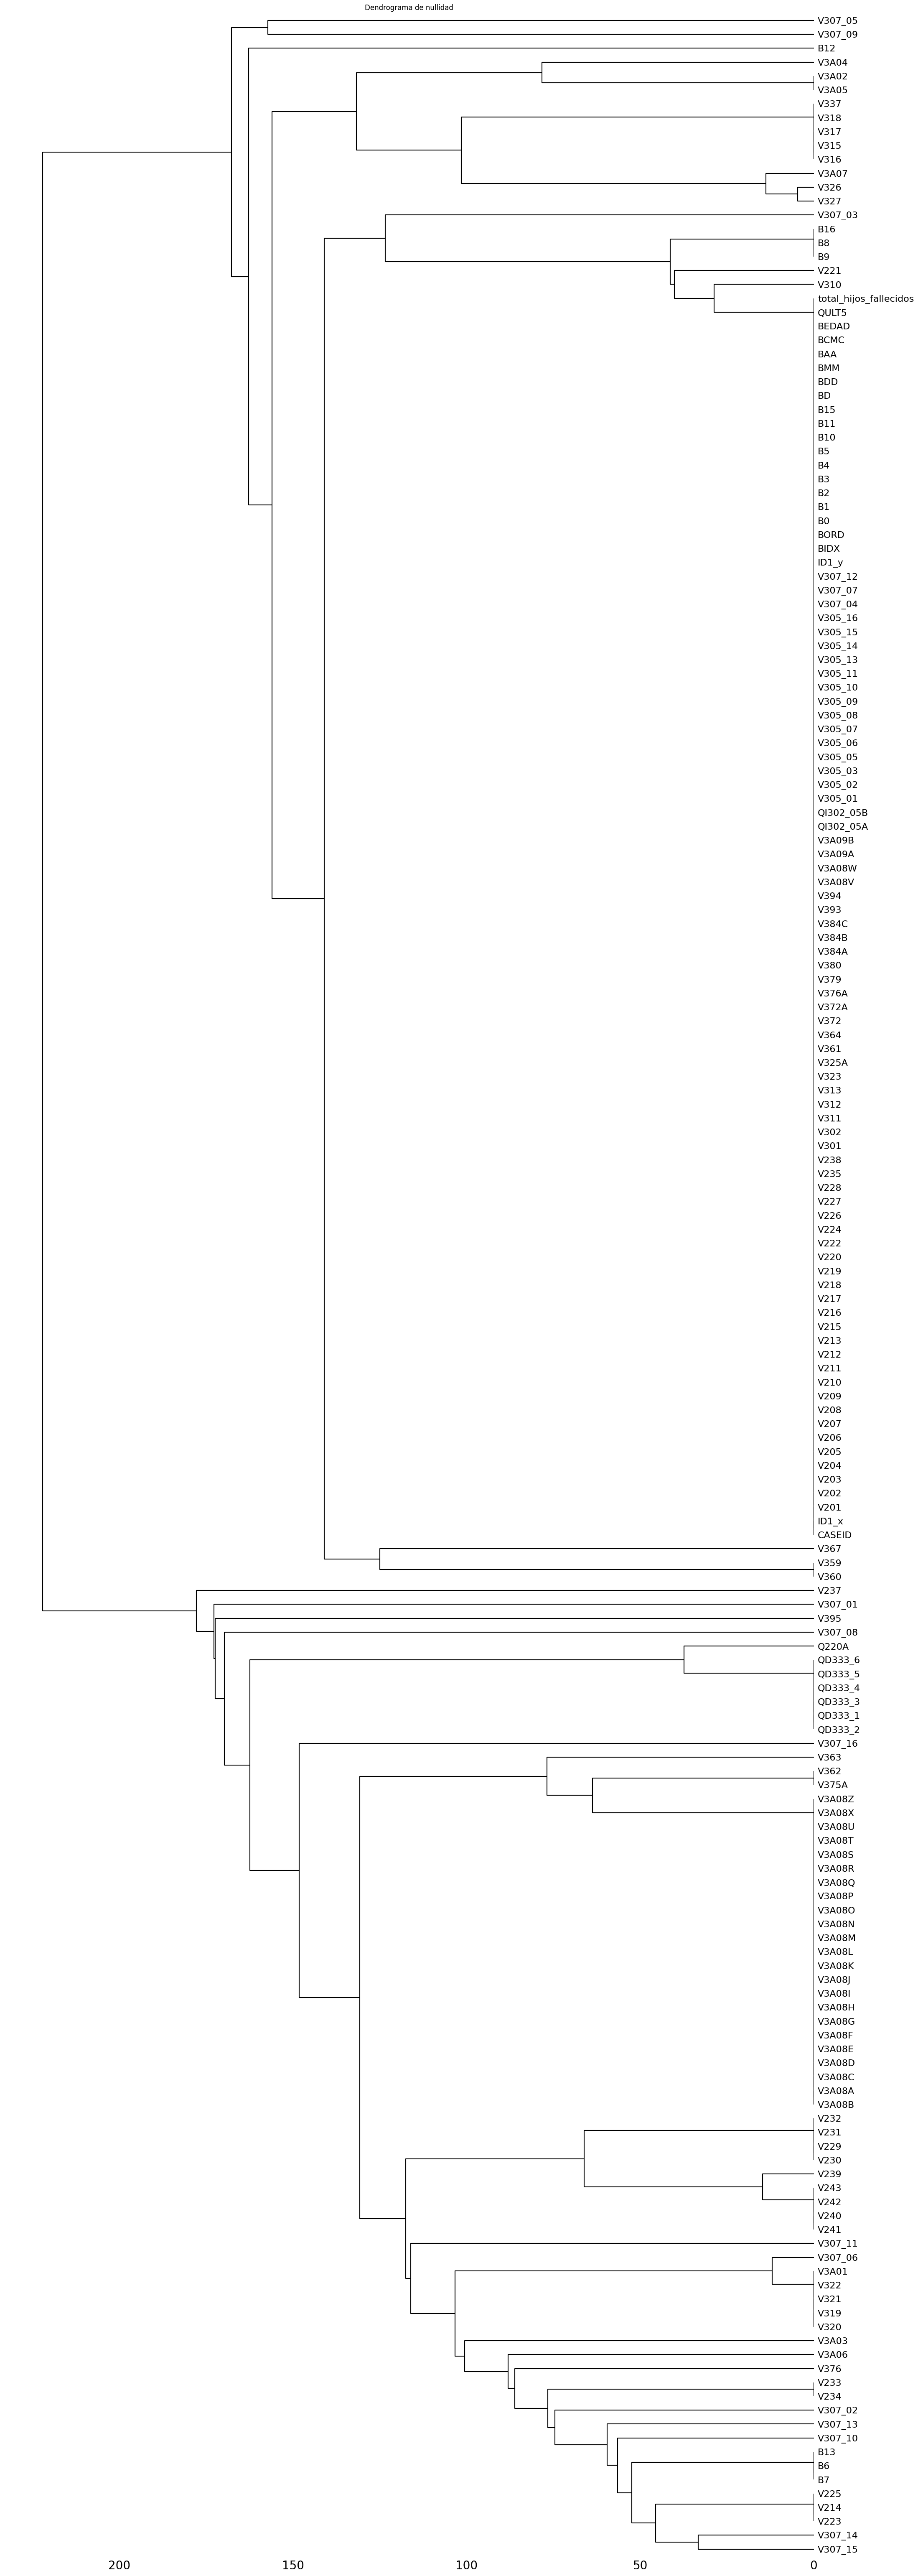

In [24]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt



# Calcular el tamaño de la figura dinámicamente basado en el número de columnas
num_columns = len(merged_df.columns)
fig_width = min(20, num_columns * 0.5)
fig_height = 8

# Generar la gráfica de matriz de nullidad
plt.figure(figsize=(fig_width, fig_height))
msno.matrix(merged_df)
plt.title('Matriz de nullidad')
plt.show()

# Generar la gráfica de heatmap de nullidad para mostrar las interacciones de los valores nulos
plt.figure(figsize=(fig_width, fig_height))
msno.heatmap(merged_df)
plt.title('Heatmap de nullidad')
plt.show()

# Generar la gráfica de barras de nullidad
plt.figure(figsize=(fig_width, fig_height))
msno.bar(merged_df)
plt.title('Barra de nullidad')
plt.show()

# Generar la gráfica de dendrograma de nullidad
plt.figure(figsize=(fig_width, fig_height))
msno.dendrogram(merged_df)
plt.title('Dendrograma de nullidad')
plt.show()

Nodos y Ramificaciones: Cada nodo representa un grupo de columnas que tienen patrones de nulos similares. Los nodos están conectados por ramas que representan la similitud en los patrones de nulos.
Distancia entre Nodos: La altura de las ramas indica cuán similar es el patrón de valores nulos entre las columnas. Ramas más cortas indican una mayor similitud, mientras que ramas más largas indican menor similitud.
Agrupamientos: Las columnas que están agrupadas en la misma rama tienen patrones de nulos similares. Puedes usar esta información para identificar patrones comunes de nulos en diferentes columnas.

EXPORTAR MI DATAFRAME EN UN EXCEL

In [23]:
# Exportar el DataFrame a un archivo Excel
archivo_excel = 'merged_df_exportado.xlsx'
merged_df.to_excel(archivo_excel, index=False)

print(f"El DataFrame ha sido exportado a {archivo_excel}")

El DataFrame ha sido exportado a merged_df_exportado.xlsx


#QUITAR LAS FILAS QUE O TIENEN VALORES NULOS

#no funciona bien

In [25]:
# Eliminar filas con al menos un valor nulo
df_sin_nulos = merged_df.dropna()

# Mostrar el DataFrame resultante
print(df_sin_nulos)

Empty DataFrame
Columns: [ID1_x, CASEID, V201, V202, V203, V204, V205, V206, V207, V208, V209, V210, V211, V212, V213, V214, V215, V216, V217, V218, V219, V220, V221, V222, V223, V224, V225, V226, V227, V228, V229, V230, V231, V232, V233, V234, V235, V237, V238, V239, V240, V241, V242, V243, V301, V302, V310, V311, V312, V313, V315, V316, V317, V318, V319, V320, V321, V322, V323, V325A, V326, V327, V337, V359, V360, V361, V362, V363, V364, V367, V372, V372A, V375A, V376, V376A, V379, V380, V384A, V384B, V384C, V393, V394, V395, V3A01, V3A02, V3A03, V3A04, V3A05, V3A06, V3A07, V3A08A, V3A08B, V3A08C, V3A08D, V3A08E, V3A08F, V3A08G, V3A08H, V3A08I, V3A08J, ...]
Index: []

[0 rows x 183 columns]


#IMPUTACION DE VARIABLES

In [26]:
from sklearn.impute import SimpleImputer

# Crear un imputador para reemplazar los valores nulos con la media (para columnas numéricas) o la moda (para columnas categóricas)
imputador_num = SimpleImputer(strategy='mean')  # Imputar la media para datos numéricos
imputador_cat = SimpleImputer(strategy='most_frequent')  # Imputar la moda para datos categóricos

# Separar columnas numéricas y categóricas
columnas_num = merged_df.select_dtypes(include=['float64', 'int64']).columns
columnas_cat = merged_df.select_dtypes(include=['object', 'category']).columns

# Imputar datos numéricos
merged_df[columnas_num] = imputador_num.fit_transform(merged_df[columnas_num])

# Imputar datos categóricos
merged_df[columnas_cat] = imputador_cat.fit_transform(merged_df[columnas_cat])


In [27]:
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63593 entries, 0 to 63592
Columns: 183 entries, ID1_x to total_hijos_fallecidos
dtypes: float64(165), object(18)
memory usage: 88.8+ MB
None


In [28]:
# Calcular el tamaño de la figura dinámicamente basado en el número de columnas
num_columns = len(merged_df.columns)
fig_width = min(20, num_columns * 0.5)
fig_height = 8

<Figure size 2000x800 with 0 Axes>

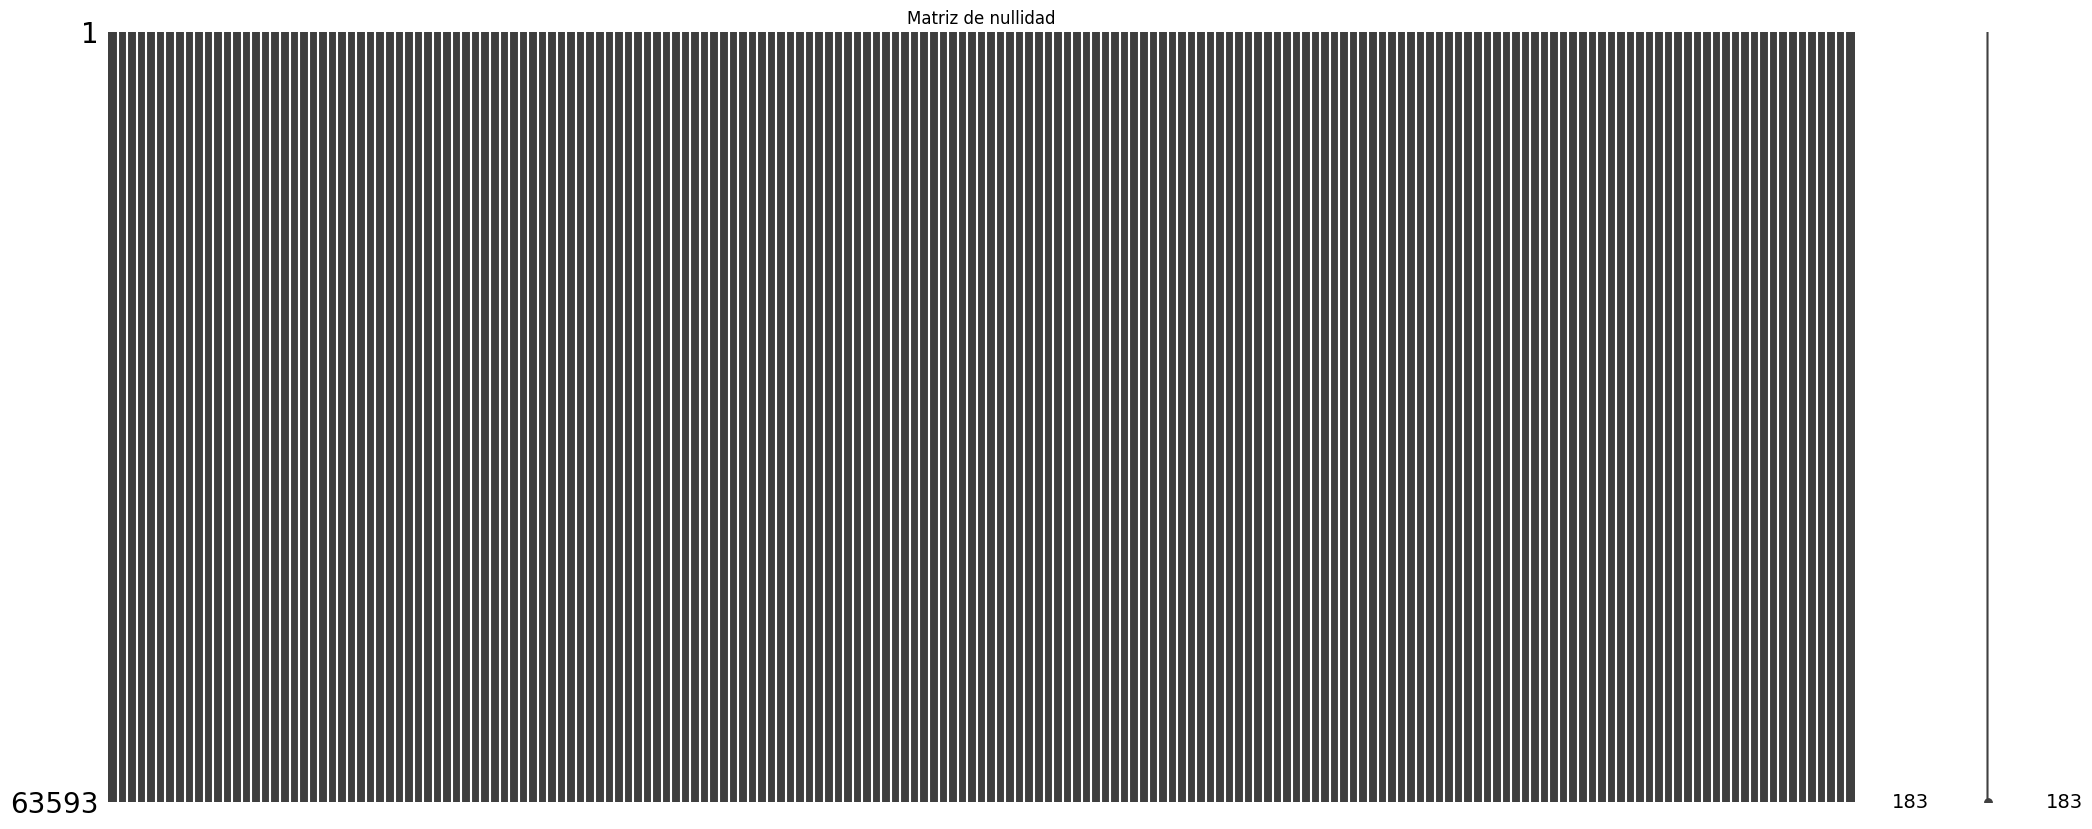

In [29]:
# Generar la gráfica de matriz de nullidad
plt.figure(figsize=(fig_width, fig_height))
msno.matrix(merged_df)
plt.title('Matriz de nullidad')
plt.show()

In [31]:
# Exportar el DataFrame a un archivo Excel
archivo_excel = 'merged_df_exportado1.xlsx'
merged_df.to_excel(archivo_excel, index=False)

print(f"El DataFrame ha sido exportado a {archivo_excel}")

El DataFrame ha sido exportado a merged_df_exportado1.xlsx


#SELCCIONAMOS LA VARIABLES SOLO NUMERICAS

In [33]:
# Seleccionar solo las variables numéricas y flotantes
numerical_df = merged_df.select_dtypes(include=['float64', 'int64'])

#Matriz de Correlaciones

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Calcular la matriz de correlaciones
correlation_matrix = numerical_df.corr()

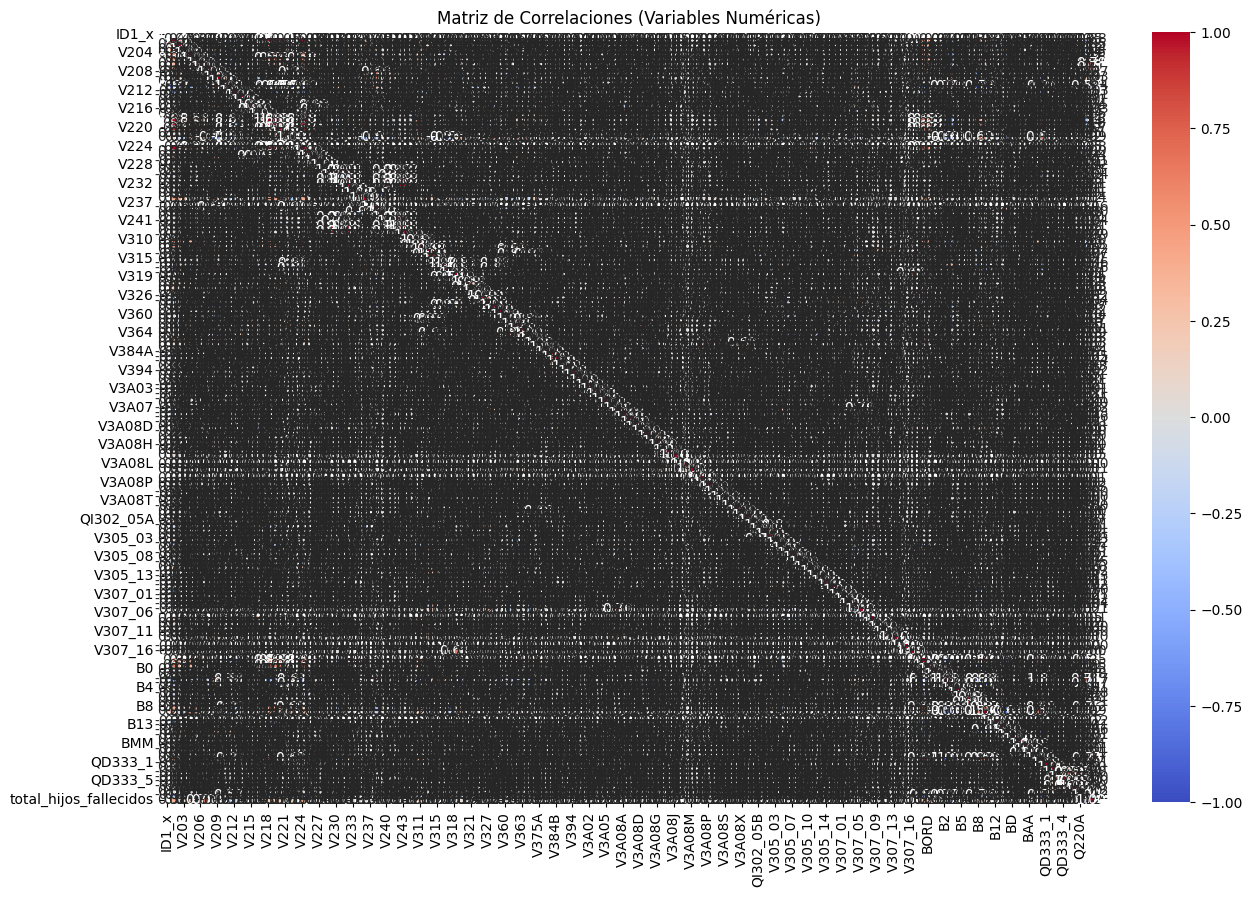

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))  # Ajustar el tamaño de la figura para acomodar muchas variables
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, linewidths=0.5)
plt.title('Matriz de Correlaciones (Variables Numéricas)')
plt.show()

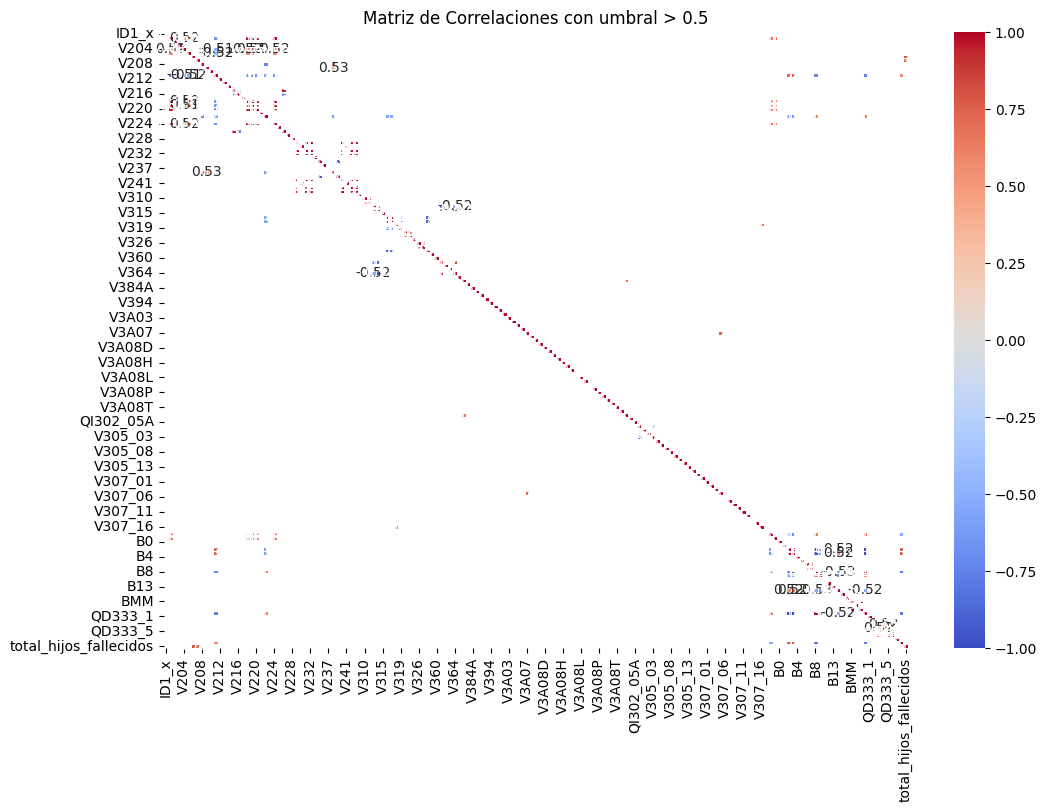

In [36]:
# Filtrar correlaciones por un umbral
threshold = 0.5  # Ajustar el umbral según tus necesidades
filtered_correlation_matrix = correlation_matrix[(correlation_matrix.abs() > threshold) & (correlation_matrix.columns != 'target')]

plt.figure(figsize=(12, 8))  # Ajustar el tamaño de la figura
sns.heatmap(filtered_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, linewidths=0.5)
plt.title(f'Matriz de Correlaciones con umbral > {threshold}')
plt.show()


In [38]:
import plotly.express as px

# Crear un heatmap interactivo con plotly
fig = px.imshow(correlation_matrix, text_auto=True, color_continuous_scale='RdBu_r', title='Matriz de Correlaciones (Variables Numéricas)')
fig.update_xaxes(side="bottom")
fig.show()


In [39]:
# Exportar la matriz de correlaciones a un archivo Excel
correlation_matrix.to_excel('matriz_de_correlaciones_numericas.xlsx', sheet_name='Correlaciones', index=True)

print("La matriz de correlaciones ha sido exportada a 'matriz_de_correlaciones_numericas.xlsx'")


La matriz de correlaciones ha sido exportada a 'matriz_de_correlaciones_numericas.xlsx'


In [40]:
# Filtrar las variables que tienen una alta correlación con la variable objetivo
target = 'total_hijos_fallecidos'  # Reemplaza con el nombre de tu variable objetivo
high_corr = correlation_matrix[target].abs().sort_values(ascending=False)
significant_vars = high_corr[high_corr > 0.3].index  # Ajusta el umbral según tus necesidades
print("Variables significativas basadas en correlación:", significant_vars)

Variables significativas basadas en correlación: Index(['total_hijos_fallecidos', 'V206', 'V207', 'B5', 'V224', 'V201'], dtype='object')


Regresión de Variables Seleccionadas
#Para evaluar la significancia de las variables

In [41]:
import statsmodels.api as sm

# Preparar los datos para el modelo de regresión lineal
X = numerical_df[significant_vars]
X = sm.add_constant(X)  # Agregar una constante al modelo
y = numerical_df[target]

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()
print(model.summary())


                              OLS Regression Results                              
Dep. Variable:     total_hijos_fallecidos   R-squared:                       1.000
Model:                                OLS   Adj. R-squared:                  1.000
Method:                     Least Squares   F-statistic:                 2.848e+17
Date:                    Thu, 04 Jul 2024   Prob (F-statistic):               0.00
Time:                            11:57:43   Log-Likelihood:             9.5185e+05
No. Observations:                   63593   AIC:                        -1.904e+06
Df Residuals:                       63586   BIC:                        -1.904e+06
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

#Seleccion mediante metodos automaticos

In [42]:
from statsmodels.tools import add_constant
import statsmodels.api as sm

def backward_selection(X, y):
    X = add_constant(X)
    initial_features = X.columns.tolist()
    while len(initial_features) > 0:
        X_train = X[initial_features]
        model = sm.GLM(y, X_train, family=sm.families.NegativeBinomial()).fit()  # Modelo de regresión binomial negativa
        p_values = model.pvalues
        max_p_value = p_values.max()
        if max_p_value > 0.05:  # Ajusta el umbral según tus necesidades
            excluded_feature = p_values.idxmax()
            initial_features.remove(excluded_feature)
        else:
            break
    return initial_features

# Aplicar selección hacia atrás
X = numerical_df[significant_vars]
y = numerical_df[target]
selected_features = backward_selection(X, y)
print("Variables seleccionadas:", selected_features)

c:\Users\acayllahu\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

c:\Users\acayllahu\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

c:\Users\acayllahu\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

c:\Users\acayllahu\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Variables seleccionadas: ['const', 'total_hijos_fallecidos', 'B5', 'V224']


In [43]:
from sklearn.feature_selection import SelectKBest, f_classif

# Definir las características y la variable objetivo
X = numerical_df[significant_vars]
y = numerical_df[target]

# Selección de variables usando ANOVA F-statistic
selector = SelectKBest(score_func=f_classif, k='all')  # Ajusta k según tus necesidades
X_new = selector.fit_transform(X, y)

# Obtener las puntuaciones de cada característica
scores = selector.scores_
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores}).sort_values(by='Score', ascending=False)
print(feature_scores)


                  Feature         Score
0  total_hijos_fallecidos           inf
1                    V206  2.076917e+04
2                    V207  1.215012e+04
3                      B5  4.070654e+03
4                    V224  2.163503e+03
5                    V201  2.163503e+03


c:\Users\acayllahu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning:

divide by zero encountered in divide



In [50]:
import pandas as pd
import statsmodels.api as sm

# Supongamos que 'merged_df' es tu DataFrame ya cargado y limpio
# Reemplaza con tus variables y objetivos reales
# significant_vars = ['var1', 'var2', 'var3']  # Ejemplo, reemplaza con tus variables significativas
# target = 'v'  # Reemplaza con el nombre de tu variable objetivo

# Verifica que las columnas están en el DataFrame
for var in significant_vars:
    if var not in merged_df.columns:
        raise KeyError(f"'{var}' no está en las columnas del DataFrame")

if target not in merged_df.columns:
    raise KeyError(f"'{target}' no está en las columnas del DataFrame")

# Preparar los datos para el modelo de regresión binomial negativa con exceso de ceros
X = merged_df[significant_vars]
X = sm.add_constant(X)  # Asegúrate de agregar la constante al modelo
y = merged_df[target]

# Ajustar el modelo de regresión binomial negativa con exceso de ceros
model = sm.GLM(y, X, family=sm.families.NegativeBinomial()).fit()
print(model.summary())

c:\Users\acayllahu\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



                   Generalized Linear Model Regression Results                    
Dep. Variable:     total_hijos_fallecidos   No. Observations:                63593
Model:                                GLM   Df Residuals:                    63588
Model Family:            NegativeBinomial   Df Model:                            4
Link Function:                        Log   Scale:                          1.0000
Method:                              IRLS   Log-Likelihood:                -13061.
Date:                    Thu, 04 Jul 2024   Deviance:                       6479.1
Time:                            12:11:11   Pearson chi2:                 3.87e+03
No. Iterations:                       100   Pseudo R-squ. (CS):             0.3099
Covariance Type:                nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------

Ajustando el Alpha

In [51]:
import pandas as pd
import statsmodels.api as sm

# Suponiendo que 'merged_df' es tu DataFrame ya cargado y limpio

# Variables significativas a considerar para el modelo
significant_vars = ['B5']  # Basado en el resumen anterior, 'B5' es significativo
target = 'total_hijos_fallecidos'  # La variable dependiente

# Preparar los datos para el modelo
X = merged_df[significant_vars]
X = sm.add_constant(X)  # Asegúrate de agregar la constante al modelo
y = merged_df[target]

# Ajustar el modelo de regresión binomial negativa con exceso de ceros
model = sm.GLM(y, X, family=sm.families.NegativeBinomial()).fit()
print(model.summary())


                   Generalized Linear Model Regression Results                    
Dep. Variable:     total_hijos_fallecidos   No. Observations:                63593
Model:                                GLM   Df Residuals:                    63591
Model Family:            NegativeBinomial   Df Model:                            1
Link Function:                        Log   Scale:                          1.0000
Method:                              IRLS   Log-Likelihood:                -22300.
Date:                    Thu, 04 Jul 2024   Deviance:                       24959.
Time:                            12:13:28   Pearson chi2:                 7.00e+04
No. Iterations:                         5   Pseudo R-squ. (CS):            0.07713
Covariance Type:                nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       

c:\Users\acayllahu\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



#VARIACIONES DEL aLPHA

In [52]:
# Ajustar el modelo de regresión binomial negativa con un valor específico de alpha
alpha_value = 0.5  # Puedes ajustar este valor según tus necesidades
model = sm.GLM(y, X, family=sm.families.NegativeBinomial(alpha=alpha_value)).fit()
print(model.summary())


                   Generalized Linear Model Regression Results                    
Dep. Variable:     total_hijos_fallecidos   No. Observations:                63593
Model:                                GLM   Df Residuals:                    63591
Model Family:            NegativeBinomial   Df Model:                            1
Link Function:                        Log   Scale:                          1.0000
Method:                              IRLS   Log-Likelihood:                -22133.
Date:                    Thu, 04 Jul 2024   Deviance:                       27032.
Time:                            12:13:57   Pearson chi2:                 7.32e+04
No. Iterations:                         5   Pseudo R-squ. (CS):            0.08659
Covariance Type:                nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [53]:
# Guardar variables significativas en un archivo Excel
pd.DataFrame({'Significant_Variables': significant_vars}).to_excel('variables_significativas.xlsx', index=False)
print("Las variables significativas han sido exportadas a 'variables_significativas.xlsx'")


Las variables significativas han sido exportadas a 'variables_significativas.xlsx'


In [ ]:
# plt.figure(figsize=(12, 8))  # Ajustar el tamaño de la figura para acomodar muchas variables
# msno.matrix(df_sin_nulos_ni_duplicados)
# plt.title('Matriz de nullidad')
# plt.show()

# Generar la gráfica de heatmap de nullidad para mostrar las interacciones de los valores nulos
# plt.figure(figsize=(12, 8))  # Ajustar el tamaño de la figura para acomodar muchas variables
# msno.heatmap(df_sin_nulos_ni_duplicados)
# plt.title('Heatmap de nullidad')
# plt.show()

In [55]:
variable = merged_df['total_hijos_fallecidos']

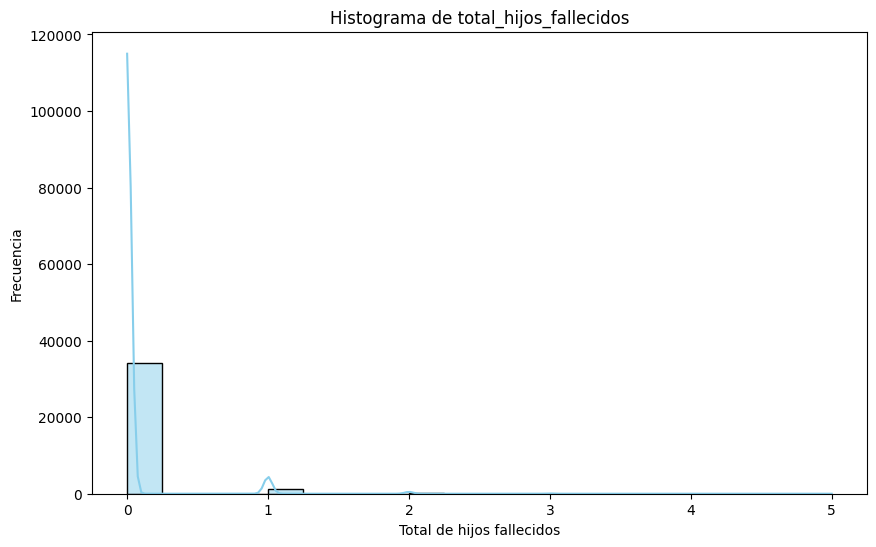

Media: 0.04722775331631938
Varianza: 0.05818006684471949
Sobredispersión: 1.231904182590358


AttributeError: 'poisson_gen' object has no attribute 'fit'

In [4]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

# Generar el histograma
plt.figure(figsize=(10, 6))
sns.histplot(variable, bins=20, kde=True, color='skyblue')
plt.title('Histograma de total_hijos_fallecidos')
plt.xlabel('Total de hijos fallecidos')
plt.ylabel('Frecuencia')
plt.show()

# Calcular la sobredispersión
media = variable.mean()
varianza = variable.var()

print(f'Media: {media}')
print(f'Varianza: {varianza}')
print(f'Sobredispersión: {varianza / media}')

# Ajuste de la distribución
# Prueba de bondad de ajuste para diferentes distribuciones
dist_names = ['poisson', 'nbinom', 'geom', 'binom']

for dist_name in dist_names:
    dist = getattr(stats, dist_name)
    param = dist.fit(variable)
    
    # Realiza la prueba de bondad de ajuste
    D, p = stats.kstest(variable, dist_name, args=param)
    
    print(f'Distribución: {dist_name}')
    print(f'  Estadístico D: {D}')
    print(f'  Valor p: {p}')


Interpretar los valores de la media, varianza y sobredispersión de la variable total_hijos_fallecidos es importante para comprender la naturaleza de los datos. Vamos a analizar cada uno de estos valores:

Media:

Valor: 0.047
Interpretación: En promedio, el número de hijos fallecidos por individuo en tu conjunto de datos es aproximadamente 0.047. Este valor es bastante bajo, lo que sugiere que la mayoría de los individuos tienen cero hijos fallecidos.
Varianza:

Valor: 0.058
Interpretación: La varianza mide la dispersión de los datos respecto a la media. Un valor de varianza de 0.058 indica que hay cierta variabilidad en los datos, aunque es baja. Esto es coherente con la media baja, ya que los datos parecen estar concentrados alrededor de valores bajos, principalmente ceros.
Sobredispersión:

Valor: 1.232
Interpretación: La sobredispersión se calcula como la varianza dividida por la media. Si el valor es cercano a 1, se dice que los datos no tienen sobredispersión. En este caso, el valor de 1.232 indica que hay una ligera sobredispersión en los datos. Esto significa que la varianza es un poco mayor de lo que se esperaría si los datos siguieran una distribución de Poisson, donde la media y la varianza serían iguales.
La ligera sobredispersión sugiere que una distribución de Poisson puede no ser la mejor para modelar estos datos. En cambio, podrías considerar la distribución binomial negativa, que es adecuada para datos con sobredispersión.

Siguiente paso: Determinar la distribución más adecuada

De los resultados obtenidos con las pruebas de bondad de ajuste (como la prueba de Kolmogorov-Smirnov), podríamos determinar cuál distribución se ajusta mejor a los datos.

Si necesitas ayuda para interpretar los resultados de las pruebas de bondad de ajuste, puedes proporcionar los valores obtenidos y te ayudaré a analizarlos.

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import scipy.stats as stats
# import seaborn as sns
# import numpy as np

# # Define la ruta del archivo y el nombre de la hoja
# file_path = 'RE223132_2023.xlsx'
# sheet_name = 'datos'

# # Carga los datos en un DataFrame
# df = pd.read_excel(file_path, sheet_name=sheet_name)

# # Selecciona la variable de interés
# variable = df['total_hijos_fallecidos']

# # Generar el histograma
# plt.figure(figsize=(10, 6))
# sns.histplot(variable, bins=20, kde=True, color='skyblue')
# plt.title('Histograma de total_hijos_fallecidos')
# plt.xlabel('Total de hijos fallecidos')
# plt.ylabel('Frecuencia')
# plt.show()

# # Calcular la sobredispersión
# media = variable.mean()
# varianza = variable.var()

# print(f'Media: {media}')
# print(f'Varianza: {varianza}')
# print(f'Sobredispersión: {varianza / media}')

# # Ajuste de la distribución
# # Prueba de bondad de ajuste para diferentes distribuciones
# dist_names = ['poisson', 'nbinom', 'geom']

# # Convertimos la variable a un array de numpy
# data = np.array(variable)

# # Definimos una función para ajustar y realizar la prueba de bondad de ajuste
# def fit_and_test_distribution(data, dist_name):
#     dist = getattr(stats, dist_name)
#     params = dist.fit(data)
    
#     # Realiza la prueba de bondad de ajuste
#     D, p = stats.kstest(data, dist_name, args=params)
    
#     return dist_name, D, p, params

# # Realizamos la prueba de bondad de ajuste para cada distribución
# results = [fit_and_test_distribution(data, dist_name) for dist_name in dist_names]

# # Mostramos los resultados
# for result in results:
#     dist_name, D, p, params = result
#     print(f'Distribución: {dist_name}')
#     print(f'  Estadístico D: {D}')
#     print(f'  Valor p: {p}')
#     print(f'  Parámetros: {params}')


In [6]:
# Proporción de ceros en la variable
proporcion_ceros = (variable == 0).mean()
print(f'Proporción de ceros: {proporcion_ceros}')


Proporción de ceros: 0.9583531985304429


In [7]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Crear un DataFrame solo con la variable de interés
data = pd.DataFrame({'total_hijos_fallecidos': variable})

# Ajustar el modelo Zero-Inflated Negative Binomial (ZINB)
model = smf.mnlogit('total_hijos_fallecidos ~ 1', data).fit()

# Mostrar los resultados del ajuste
print(model.summary())


c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\discrete\discrete_model.py:3025: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\discrete\discrete_model.py:3026: RuntimeWarning: invalid value encountered in divide
  return eXB/eXB.sum(1)[:,None]


Optimization terminated successfully.
         Current function value: nan
         Iterations 5


c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\discrete\discrete_model.py:3057: RuntimeWarning: divide by zero encountered in log
  logprob = np.log(self.cdf(np.dot(self.exog,params)))
c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\discrete\discrete_model.py:3058: RuntimeWarning: invalid value encountered in multiply
  return np.sum(d * logprob)


                            MNLogit Regression Results                            
Dep. Variable:     total_hijos_fallecidos   No. Observations:                35657
Model:                            MNLogit   Df Residuals:                    35652
Method:                               MLE   Df Model:                            0
Date:                    Wed, 03 Jul 2024   Pseudo R-squ.:                     nan
Time:                            21:52:45   Log-Likelihood:                    nan
converged:                           True   LL-Null:                       -6784.1
Covariance Type:                nonrobust   LLR p-value:                       nan
total_hijos_fallecidos=1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                       nan        nan        nan        nan         nan         nan
---------------------------------------------------------

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Define la ruta del archivo y el nombre de la hoja
file_path = 'RE223132_2023.xlsx'
sheet_name = 'datos'

# Carga los datos en un DataFrame
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Selecciona la variable de interés
variable = df['total_hijos_fallecidos']

# Generar el histograma
plt.figure(figsize=(10, 6))
sns.histplot(variable, bins=20, kde=True, color='skyblue')
plt.title('Histograma de total_hijos_fallecidos')
plt.xlabel('Total de hijos fallecidos')
plt.ylabel('Frecuencia')
plt.show()

# Calcular la sobredispersión
media = variable.mean()
varianza = variable.var()

print(f'Media: {media}')
print(f'Varianza: {varianza}')
print(f'Sobredispersión: {varianza / media}')

# Proporción de ceros en la variable
proporcion_ceros = (variable == 0).mean()
print(f'Proporción de ceros: {proporcion_ceros}')

# Crear un DataFrame solo con la variable de interés
data = pd.DataFrame({'total_hijos_fallecidos': variable})

# Ajustar el modelo Zero-Inflated Negative Binomial (ZINB)
model = smf.mnlogit('total_hijos_fallecidos ~ 1', data).fit()

# Mostrar los resultados del ajuste
print(model.summary())
